In [1]:
import cv2
import numpy as np
import skimage.io as io
from skimage.io import imread
from skimage.io import imread_collection
from skimage.io import imshow_collection
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from skimage import measure
from skimage.util import img_as_ubyte
from skimage import feature
from stl import mesh

#__USER'S INITIALIZATIONS______________________________________________#

default_name_input = "flyStanding.tif"
default_name_output = "my_test.stl"

#__NON-USER'S INITIALIZATIONS__________________________________________#

name_of_input = default_name_input
name_of_output = default_name_output

images = img_as_ubyte(io.imread(name_of_input))

print('The shape is ',images.shape)
print('The datatype is',images.dtype)

The shape is  (1380, 1977, 1849)
The datatype is uint8


In [68]:
#__FUNCTION(S)_________________________________________________________#

def fill_holes (to_fill_img, size_ellipse) :

       # Dilation of the image
	   kern = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (size_ellipse,size_ellipse))
	   dil_img = cv2.dilate(to_fill_img, kern, iterations = 1)
	   
	   # Copy because dil_img needed at the end
	   floodfill_img = dil_img.copy();
	   
	   # Mask used to flood filling, size 2 pixels bigger than the image.
	   h, w = to_fill_img.shape[:2]
	   mask = np.zeros((h+2, w+2), np.uint8)
	   
	   # Floodfill from point (w-2,0)
	   cv2.floodFill(floodfill_img, mask, (w-2,0), (255,255,255));
	   
	   # Invert floodfilled image
	   inv_floodfill_img = cv2.bitwise_not(floodfill_img)
	   
	   # Combine the two images to get the foreground.
	   res_img = cv2.bitwise_or(dil_img, inv_floodfill_img)
	   
	   
	   return res_img

In [69]:
#__PROCESSING OF THE IMAGES____________________________________________#
numImg = 0
a = np.zeros(images.shape, dtype=np.uint8)
for img in images:
    print(numImg)
	   
    # Filter the image (Gaussian way)
    filter_img = cv2.GaussianBlur(img, (5,5), 0.3)
    fil_avg = np.mean(filter_img)
    fil_std = np.std(filter_img)
	       
    # Threshold the image
    threshold = np.min([fil_avg+fil_std, 100])
    (T, thresh_img) = cv2.threshold(filter_img, threshold,255,cv2.THRESH_BINARY)
	       
    # Filling holes of the image 
    #res_img = thresh_img
    res_img = fill_holes(thresh_img, 2)
    #cv2.imshow('test',res_img)
    #io.imshow(res_img)
    #cv2.waitKey(0)	    
   
    # Storage in the memory
    a[numImg] = res_img.astype(np.uint8)
	   
	   
    numImg += 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [7]:
import tifffile

def sepe(out, name):
    with tifffile.TiffWriter(name) as tiff:
        for img in out:
            tiff.save(img)
    print("I am done")

# right front

In [3]:
ref = 9.37523
obj = 5.50395
print("The frame of ending point is ",740 - (ref - obj) * 100)

obj = 1.96841
print("The frame of begining point is ",740 - (ref - obj) * 100)

rt_fr = images[0:360, 120:430, 780:930]
name = 'rt_fr.tif'
#sepe(rt_fr, name)

The frame of ending point is  352.87199999999996
The frame of begining point is  -0.6820000000000164


# left front

In [85]:
obj = 7.06239
print("The frame of ending point is ",740 - (ref - obj) * 100)
obj = 4.76097
print("The frame of begining point is ",740 - (ref - obj) * 100)

lf_fr = images[250:510, 700:900, 250:600]
name = 'left_f.tif'
sepe(rt_fr, name)

The frame of begining point is  508.71599999999995
The frame of begining point is  278.574


# left middle

In [8]:
obj = 7.33022
print("The frame of ending point is ",740 - (ref - obj) * 100)
obj = 4.50006
print("The frame of begining point is ",740 - (ref - obj) * 100)

segment = images[240:560, 1300:1900, 400:750]
name = 'left_mid.tif'  
sepe(segment, name)

The frame of ending point is  535.499
The frame of begining point is  252.483
I am done


# left hind

In [10]:
obj = 7.48403
print("The frame of ending point is ",740 - (ref - obj) * 100)
obj = 5.17749
print("The frame of begining point is ",740 - (ref - obj) * 100)

segment = images[320:560, 1350:1900, 850:1200]
name = 'left_hind.tif'  
sepe(segment, name)

The frame of ending point is  550.88
The frame of begining point is  320.22599999999994
I am done


# right hind

In [13]:
obj = 6.59796
print("The frame of ending point is ",740 - (ref - obj) * 100)
obj = 5.17749
print("The frame of begining point is ",740 - (ref - obj) * 100)

segment = images[120:460, 1050:1300, 1400:1800]
name = 'right_hind.tif'  
sepe(segment, name)

The frame of ending point is  462.27299999999997
The frame of begining point is  320.22599999999994
I am done


# right middle

In [17]:
obj = 5.48297
print("The frame of ending point is ",740 - (ref - obj) * 100)
obj = 5.17749
print("The frame of begining point is ",740 - (ref - obj) * 100)

segment = images[20:350, 450:700, 1300:1650]
name = 'right_middle.tif'  
sepe(segment, name)

The frame of ending point is  350.774
The frame of begining point is  320.22599999999994
I am done


In [5]:
segment.shape

(320, 600, 350)

In [92]:
images.shape

(500, 1977, 1849)

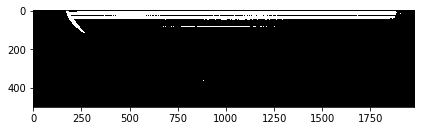

In [135]:
io.imshow(a[:,:,1000])

In [41]:
b = io.imread('flyBinary.tif')
b.shape

(1380, 1977, 1849)

(500, 1977, 1849)

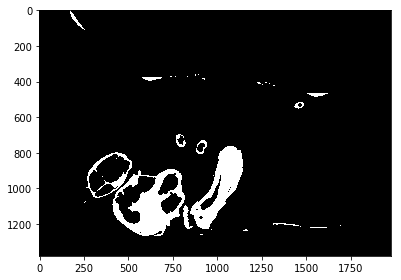

In [136]:
io.imshow(b[:,:,1000])
images[:,:,:].shape

In [8]:
#__CREATION AND SAVING OF THE MESH_____________________________________#

# Marching cubes to obtain the surface mesh
verts, faces, normals, values = measure.marching_cubes_lewiner(a)

print('shape of verts is ', verts.shape)
print('shape of faces is ', faces.shape)
print('shape of normals is ', normals.shape)
print('shape of values is ', values.shape)

# Creation of the mesh
real_mesh = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
	    real_mesh.vectors[i][j] = verts[f[j],:]/100
	    	    
# Write the mesh to file
real_mesh.save(name_of_output)

shape of verts is  (14480451, 3)
shape of faces is  (28910168, 3)
shape of normals is  (14480451, 3)
shape of values is  (14480451,)
